In [28]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from xgboost import XGBRegressor  # Ensure XGBoost is installed: pip install xgboost


In [32]:
# Load the dataset
df = pd.read_csv("veri.csv")

# Check if 'location' exists and convert categorical columns to one-hot encoding
if "location" in df.columns:
    df = pd.get_dummies(df, columns=["location"], drop_first=True)

# Split data into features (X) and target (y)
X = df.drop("price", axis=1)
y = df["price"]


In [33]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "AdaBoost Regression": AdaBoostRegressor(),
    "XGBoost": XGBRegressor()  # Ensure to install xgboost via `pip install xgboost`
}

# Dictionary to store model performance
model_performance = {}

# Train each model and evaluate performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate RMSE and R-squared
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store the performance metrics
    model_performance[model_name] = {"RMSE": rmse, "R2": r2}

    print(f"{model_name}:")
    print(f"  RMSE: {rmse}")
    print(f"  R2: {r2}")
    print("="*50)


Linear Regression:
  RMSE: 11952.574319201696
  R2: 0.9582235073077814
Decision Tree:
  RMSE: 20400.209448270452
  R2: 0.8783034340160149
Random Forest:
  RMSE: 14369.166703960904
  R2: 0.939622901662771
Gradient Boosting:
  RMSE: 12618.727834409401
  R2: 0.953437078901135
Support Vector Regression:
  RMSE: 57997.794938025174
  R2: 0.016369390399881945
K-Nearest Neighbors:
  RMSE: 26597.041917970862
  R2: 0.793140368650439
Lasso Regression:
  RMSE: 11952.541936643536
  R2: 0.9582237336737233
Ridge Regression:
  RMSE: 11952.305059545477
  R2: 0.9582253895127455
AdaBoost Regression:
  RMSE: 20309.80549166119
  R2: 0.8793796458687911
XGBoost:
  RMSE: 13408.737295403052
  R2: 0.9474243276615513


In [35]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 179794235.86
R-squared: 0.95


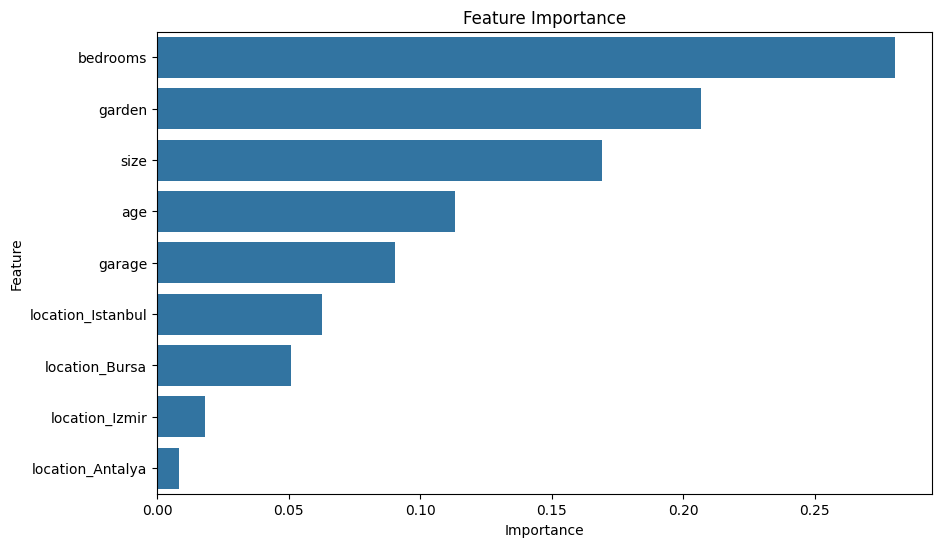

In [39]:
# Feature importance
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()


In [41]:
# Find the best model based on RMSE
best_model_name = min(model_performance, key=lambda name: model_performance[name]["RMSE"])
best_model = models[best_model_name]

# Save the best model
joblib.dump(best_model, "eniyi.joblib")
print(f"The best model ({best_model_name}) has been saved as 'eniyi.joblib'.")


The best model (Ridge Regression) has been saved as 'eniyi.joblib'.
